In [2]:
import graph_tool.all as gt

In [3]:
g = gt.Graph()

In [4]:
v1 = g.add_vertex()
v2 = g.add_vertex()

In [5]:
e = g.add_edge(v1, v2)

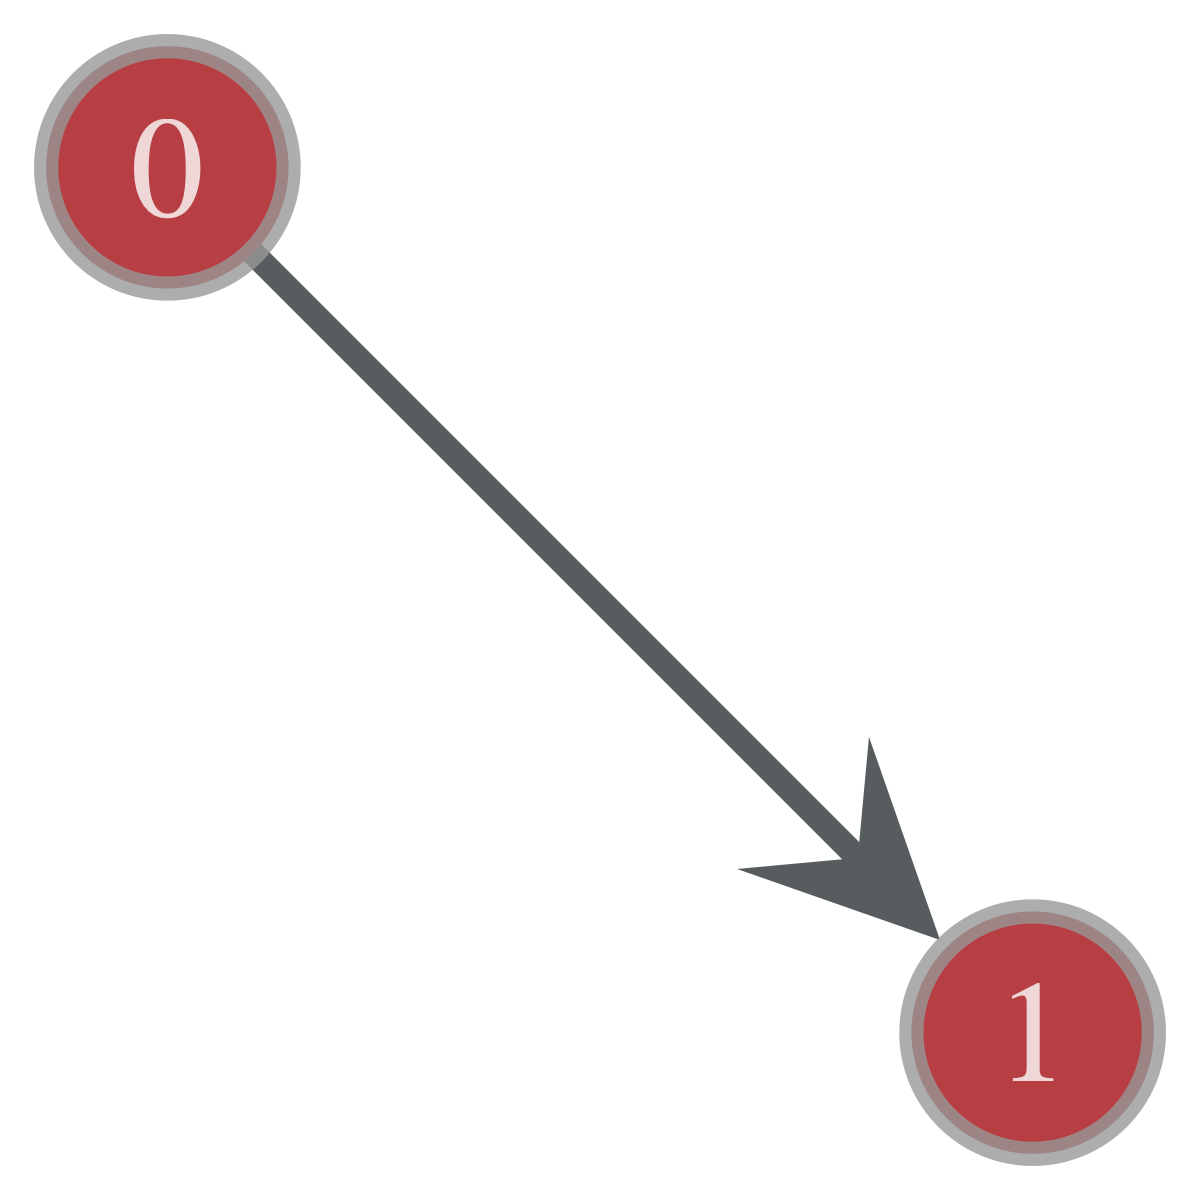

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x152409a60, at 0x152415100>

In [6]:
gt.graph_draw(g,
             vertex_text = g.vertex_index,
             )

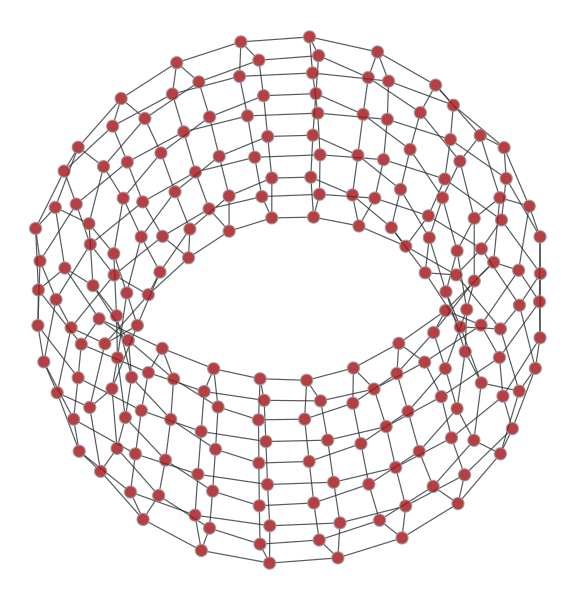

In [7]:
g = gt.lattice([10,20], periodic=True)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(300,300));

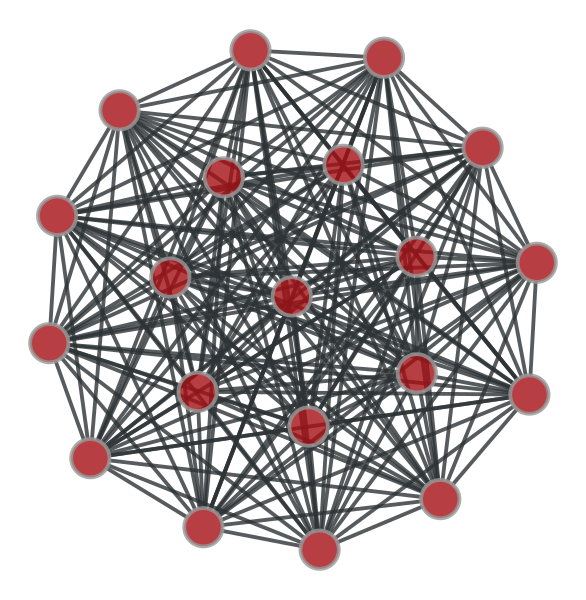

In [9]:
g = gt.complete_graph(20)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(300,300));

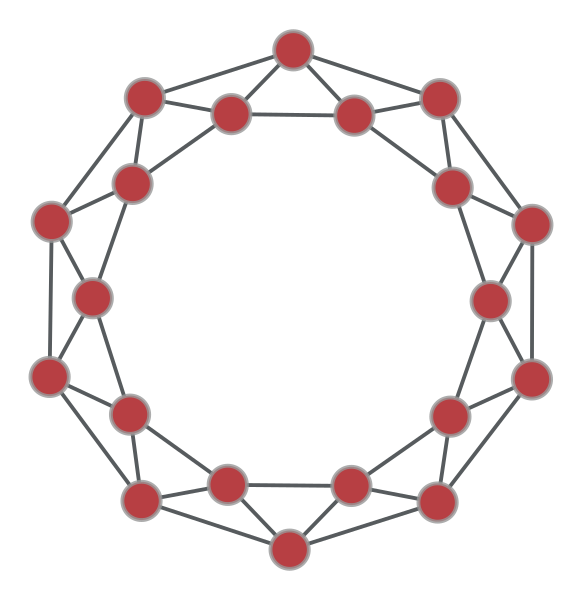

In [10]:
g = gt.circular_graph(20,2)
pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(g, pos=pos, output_size=(300,300));

In [12]:
import numpy.random as rnd

In [15]:
def ws_graph(n, k, p):
  base_g = gt.circular_graph(n, k)

  if p == 0:
    return base_g

  g = gt.Graph(directed=False)
  g.add_vertex(n)

  for edg in base_g.edges():
    st_vtx = edg.source()
    tg_vtx = edg.target()
    if rnd.random() < p:
      nw_tg_idx = rnd.choice(n)
      nw_tg_vtx = base_g.vertex(nw_tg_idx)
      while((nw_tg_vtx in st_vtx.all_neighbors())
      or nw_tg_vtx == st_vtx):
          nw_tg_idx = rnd.choice(n)
          nw_tg_vtx = base_g.vertex(nw_tg_idx)
      if g.edge(st_vtx, nw_tg_vtx) == None:
        g.add_edge(st_vtx, nw_tg_vtx)
    else:
      if g.edge(st_vtx, tg_vtx) == None:
        g.add_edge(st_vtx, tg_vtx)
  
  return g

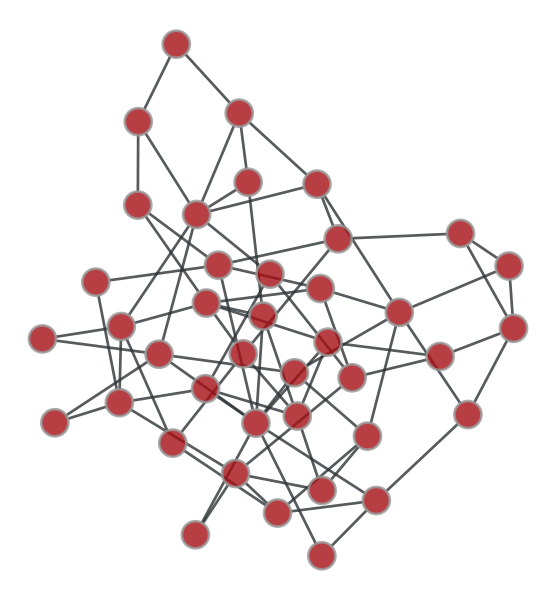

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x14dc3f6d0, at 0x14dc3f160>

In [21]:
ws_g = ws_graph(40, 2, 0.99)
pos = gt.sfdp_layout(ws_g, cooling_step=0.95, epsilon=1e-2)
gt.graph_draw(ws_g, pos=pos, output_size=(300,300))

In [22]:
import numpy as np

def avr_distance(g):
  return np.mean([np.mean(dist_itm) for dist_itm in gt.shortest_distance(g)])